In [1]:
!git clone https://github.com/probml/pyprobml /pyprobml &> /dev/null
%cd -q /pyprobml/scripts
import pyprobml_utils as pml
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from __future__ import print_function
import matplotlib as mpl
import matplotlib.pyplot as plt 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from scipy import linalg
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
import numpy as np

##FischerLDA
It is done in 2 ways:

a) Using sklearn.discriminant 

b) According to the book

In [3]:
# Dataset according to matlab code:

n = 100 
a = np.random.multivariate_normal((1, 3), [[4.0, 0.01], [0.01, 0.1]], n)
b = np.random.multivariate_normal((3, 1), [[4.0, 0.01], [0.01, 0.1]], n)

X = np.vstack((a, b))

Y = np.hstack((np.zeros(n), np.ones(n)))

mu_a, mu_b = a.mean(axis=0).reshape(-1,1), b.mean(axis=0).reshape(-1,1)

xmax = np.max(X[:, 0])
xmin = np.min(X[:, 0])
ymax = np.max(X[:, 1]) 
ymin = np.min(X[:, 1])

saving image to ../figures/../figures/data.pdf


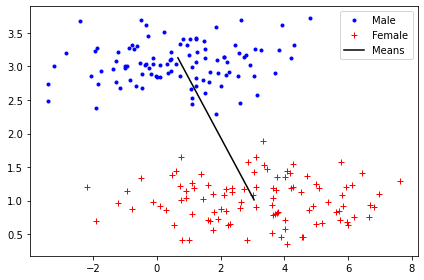

In [4]:
plt.plot(a[:,0], a[:,1], 'b.', b[:,0], b[:,1], 'r+')
plt.plot(mu_a, mu_b, 'black')
plt.legend(['Male', 'Female', 'Means'])
pml.save_fig("../figures/data.pdf")
plt.show()
#plt.savefig('data.png')

# a)

In [5]:
lda = LinearDiscriminantAnalysis()
X_fit = lda.fit(X, Y)
X_tran = lda.transform(X)

saving image to ../figures/../figures/Projection_of_points_on_fisher_vec.pdf


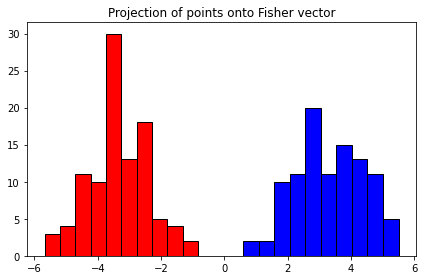

In [6]:
nMale = 100
nFemale = 200
plt.hist(X_tran[:nMale, :], color='red', ec='black')
plt.hist(X_tran[nMale:nFemale, :], color='blue', ec='black')
plt.title('Projection of points onto Fisher vector')
pml.save_fig("../figures/Projection_of_points_on_fisher_vec.pdf")
plt.show()
#plt.savefig('Projection_of_points_on_fisher_vec.png') # Figure 9.5(a)

# b)

In [7]:
def calculate_covariance_matrix(X, Y=None):
    if Y is None:
        Y = X
    n_samples = np.shape(X)[0]
    covariance_matrix = (1 / (n_samples-1)) * (X - X.mean(axis=0)).T.dot(Y - Y.mean(axis=0))

    return np.array(covariance_matrix, dtype=float)
 

In [8]:
# Covariance matrices of the two datasets
cov1 = calculate_covariance_matrix(a)
cov2 = calculate_covariance_matrix(b)
cov_tot = cov1 + cov2

# Mean of the two datasets
mean1 = a.mean(0)
mean2 = b.mean(0)
mean_diff = np.atleast_1d(mean1 - mean2)

# The vector w, which when X is projected onto it best separates the data by class. 
# w = (mean1 - mean2) / (cov1 + cov2) [Formula in topic 9.2.6.1 in the book]

w = np.linalg.pinv(cov_tot).dot(mean_diff)

In [9]:
slope = w[1]/w[0]
mid_point = (mu_a + mu_b)/2
c = mid_point[1] - slope*mid_point[0]
x = np.linspace(-5, 5, 100)

saving image to ../figures/../figures/FischerLDA_vector.pdf


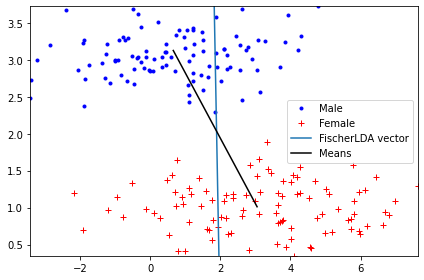

In [10]:
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.plot(a[:,0], a[:,1], 'b.', b[:,0], b[:,1], 'r+')
plt.plot(x, slope*x + c)
plt.plot(mu_a, mu_b, 'black')
plt.legend(['Male', 'Female', 'FischerLDA vector', 'Means'])
pml.save_fig("../figures/FischerLDA_vector.pdf")
plt.show()
#plt.savefig('FischerLDA vector')

In [11]:
Xproj_fish = X.dot(w) 
Xproj_fish_male = Xproj_fish[:nMale]
Xproj_fish_female = Xproj_fish[nMale:nFemale]

saving image to ../figures/../figures/Projection_of_points_on_fisher2_vec.pdf


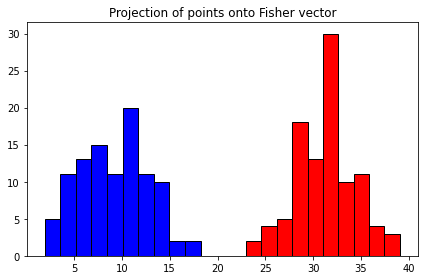

In [12]:
plt.hist(Xproj_fish_male, color='red', ec='black')
plt.hist(Xproj_fish_female, color='blue', ec='black')
plt.title('Projection of points onto Fisher vector')
pml.save_fig("../figures/Projection_of_points_on_fisher2_vec.pdf")
plt.show()
#plt.savefig('Projection_of_points_on_fisher2_vec.png') # Figure 9.5(a)

##PCA

It is done in 2 ways:

a) Using sklearn.decomposition

b) Manual principal component analysis

# a)

In [13]:
pca = PCA(n_components=1)

X_fit = pca.fit(X)
X_tran = pca.transform(X)

saving image to ../figures/../figures/Projection_of_points_on_pca_vec.pdf


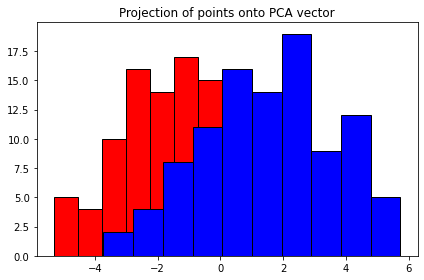

In [14]:
plt.hist(X_tran[:nMale, :], color='red', ec='black')
plt.hist(X_tran[nMale:nFemale, :], color='blue', ec='black')
plt.title('Projection of points onto PCA vector')
pml.save_fig("../figures/Projection_of_points_on_pca_vec.pdf")
plt.show()
#plt.savefig('Projection_of_points_on_pca_vec.png') # Figure 9.5(b)

# b)

In [15]:
# calculate the mean of each column
M = mean(X.T, axis=1)
# center columns by subtracting column means
C = X - M
# calculate covariance matrix of centered matrix
V = cov(C.T)
# eigendecomposition of covariance matrix
values, vectors = eig(V)
# project data
P = vectors.T.dot(C.T)

In [16]:
vector = vectors[:, 0]
mu_a, mu_b = a.mean(axis=0).reshape(-1,1), b.mean(axis=0).reshape(-1,1)
slope_pca = vector[1]/vector[0]
mid_point = (mu_a + mu_b)/2
c_pca = mid_point[1] - slope_pca*mid_point[0]
x = np.linspace(-5, 5, 100)
z = np.linspace(-5, 5, 100)


saving image to ../figures/../figures/FischerLDA_and_PCA_vectors.pdf


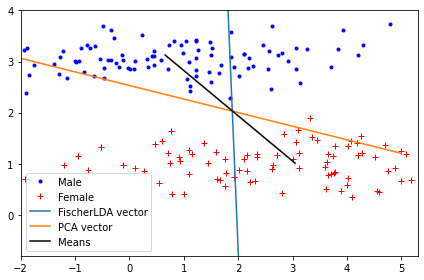

In [17]:
plt.xlim(-2, 5.3)
plt.ylim(-0.8, 4)
plt.plot(a[:,0], a[:,1], 'b.', b[:,0], b[:,1], 'r+')
plt.plot(x, slope*x + c)
plt.plot(z, slope_pca*z + c_pca)
plt.plot(mu_a, mu_b, 'black')
plt.legend(['Male', 'Female', 'FischerLDA vector', 'PCA vector', 'Means'])
pml.save_fig("../figures/FischerLDA_and_PCA_vectors.pdf")
plt.show()
#plt.savefig('FischerLDA_and_PCA_vectors.png')

In [18]:
Xproj_pca = X.dot(vector)
Xproj_pca_male = Xproj_pca[:nMale]
Xproj_pca_female = Xproj_pca[nMale:nFemale]


saving image to ../figures/../figures/Projection_of_points_on_pca2_vec.pdf


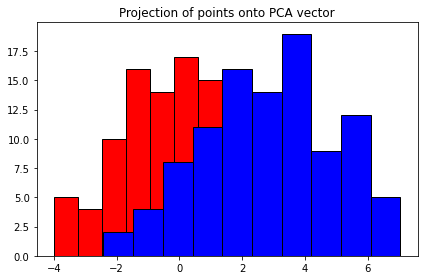

In [19]:
plt.hist(Xproj_pca_male, color='red', ec='black')
plt.hist(Xproj_pca_female, color='blue', ec='black')
plt.title('Projection of points onto PCA vector')
pml.save_fig("../figures/Projection_of_points_on_pca2_vec.pdf")
plt.show()
#plt.savefig('Projection_of_points_on_pca2_vec.png') # Figure 9.5(b)